# Exploring & Visualizing

In [28]:
import pandas as pd
import numpy as np

In [29]:

url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [30]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900


In [31]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


## Categorical Exploration


In [32]:
(housing
  ['MS Zoning'])

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [33]:
(housing
  ['MS Zoning']
  .value_counts())

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

<Axes: xlabel='MS Zoning'>

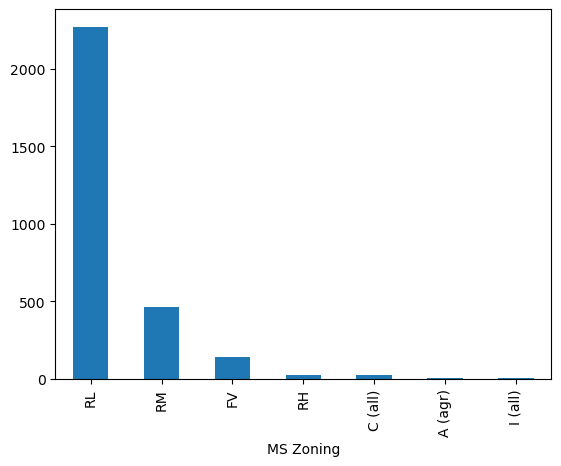

In [34]:
(housing
  ['MS Zoning']
  .value_counts()
  .plot.bar())

<Axes: ylabel='MS Zoning'>

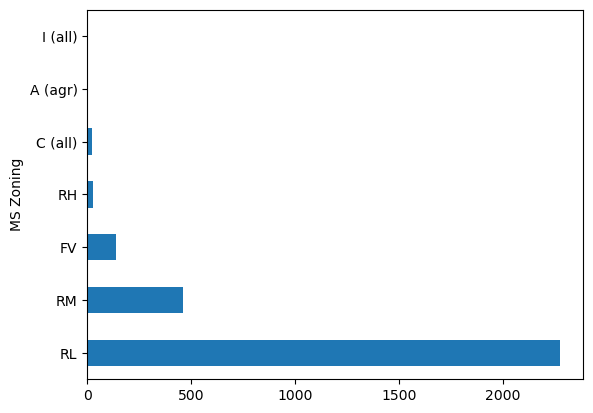

In [35]:
(housing
  ['MS Zoning']
  .value_counts()
  .plot.barh())

## Histograms and Distributions

In [36]:
(housing["SalePrice"]
 .describe()
)

count           2930.0
mean     180796.060068
std       79886.692357
min            12789.0
25%           129500.0
50%           160000.0
75%           213500.0
max           755000.0
Name: SalePrice, dtype: double[pyarrow]

<Axes: >

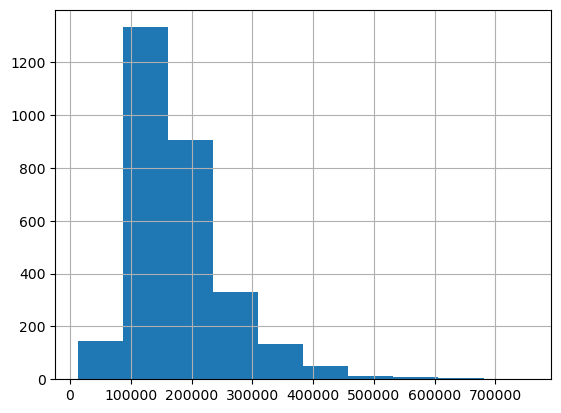

In [37]:
(housing["SalePrice"]
 .hist()
)

<Axes: >

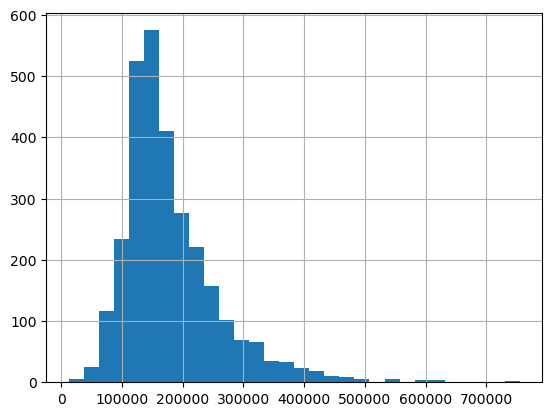

In [38]:
(housing["SalePrice"]
 .hist(bins=30)
)

## Outliers and Z-scores

In [39]:
# outlier with Z-score
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3        0.79117
4       0.113961
          ...   
2925    -0.47938
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [40]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 .query('z_score.abs() >= 3')
)

C:\Users\Pavilion HP\AppData\Local\Temp\ipykernel_608\4067817070.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('z_score.abs() >= 3')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,4.471382
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,5.393401
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,3.995709
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,4.018704
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,3.520035
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,3.807943
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,4.684184
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,3.394232
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,5.372659
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,5.033841


In [41]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 .query('z_score <= -3')
)

C:\Users\Pavilion HP\AppData\Local\Temp\ipykernel_608\1804940923.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('z_score <= -3')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score


In [42]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

housing[
calc_iqr_outlier(housing, 'SalePrice')
]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933


In [43]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

C:\Users\Pavilion HP\AppData\Local\Temp\ipykernel_608\288701225.py:11: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('iqr_outlier')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,True


## Correlations

In [44]:
# Pearson correlation
# housing.corr() # pandas dont work with non numerical values
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [45]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [46]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [47]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

## Scatter Plots

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

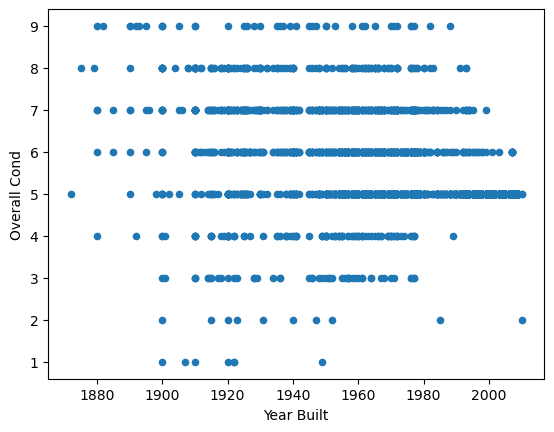

In [48]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond')
)

In [49]:
housing['Year Built'].corr(housing['Overall Cond'])

-0.3687731214135477

In [50]:
housing['Year Built'].corr(housing['Overall Cond'], method='spearman')

-0.42230619262743263

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

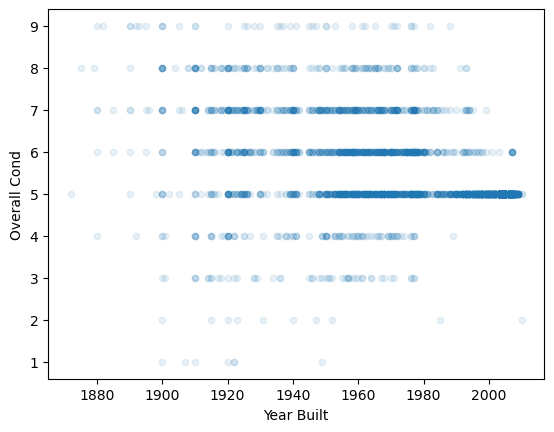

In [51]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

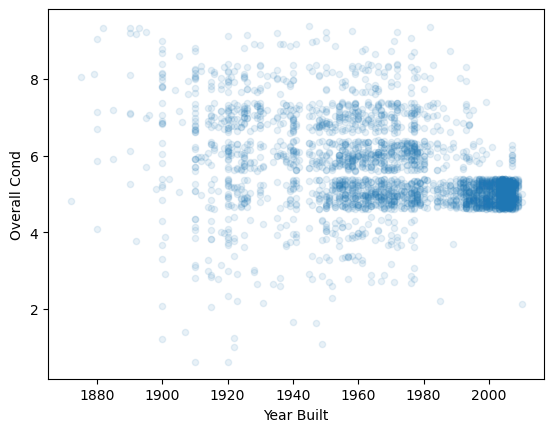

In [52]:
# with jitter in y
(housing
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

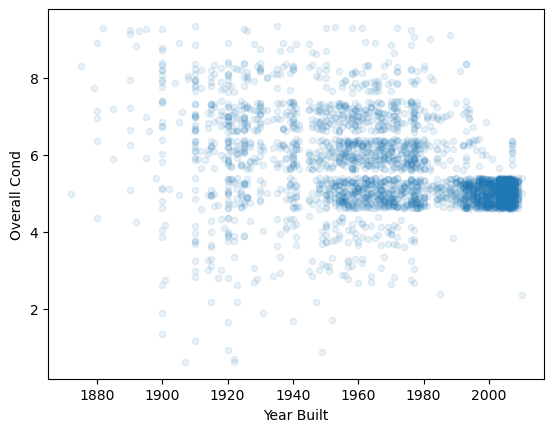

In [53]:
# make function
def jitter(df_, col, amount=.5):
    return (df_
            [col] + np.random.random(len(df_))*amount - (amount/2))
    
(housing
 .assign(#**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
     **{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

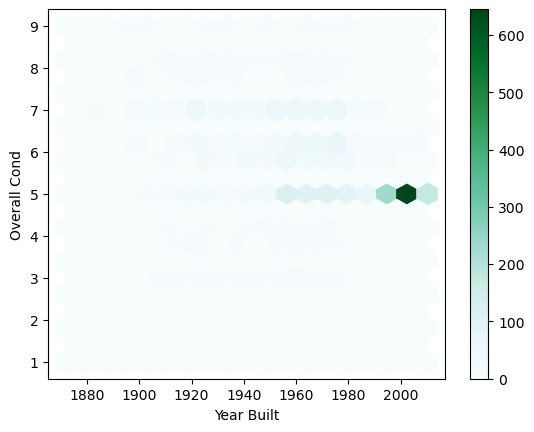

In [54]:
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)
)

## Visualizing Categoricals and Numerical Values

<Axes: >

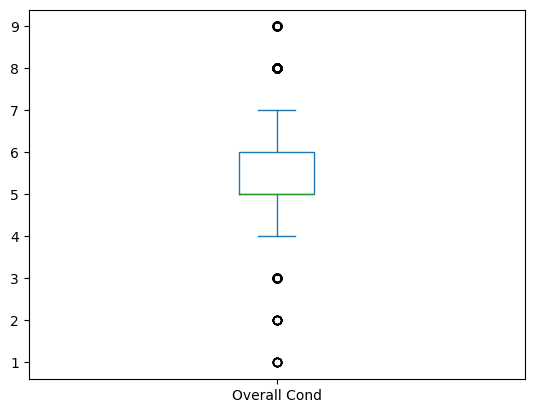

In [55]:
# Numerical and categorical
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

<Axes: >

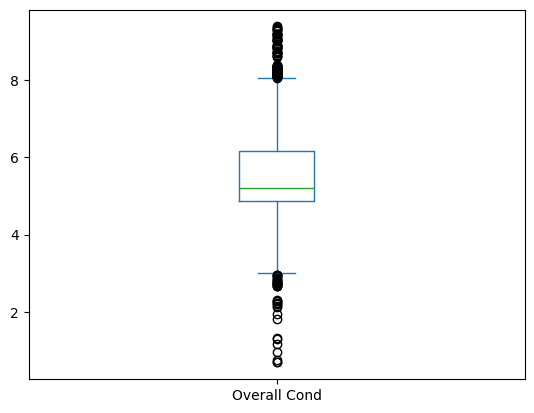

In [56]:
(housing
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

<Axes: >

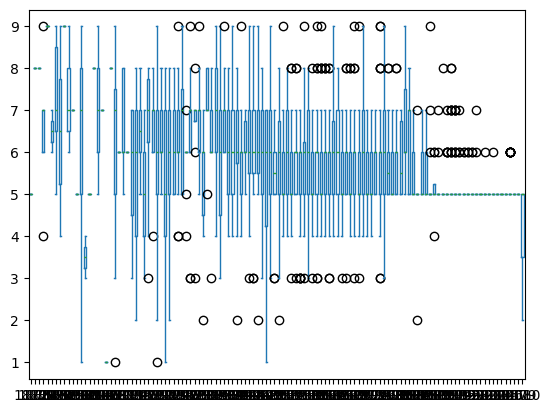

In [57]:
# Make multiple box plots
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

<Axes: >

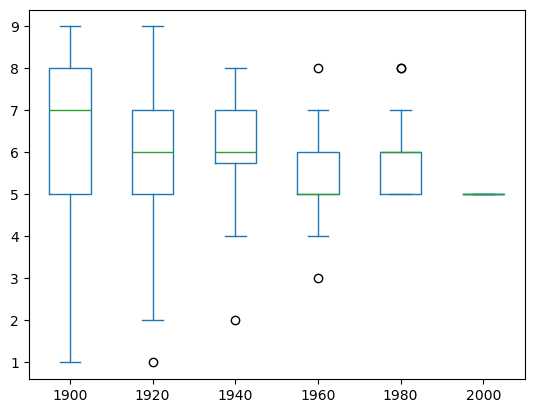

In [58]:
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
 .plot.box()
)

<Axes: >

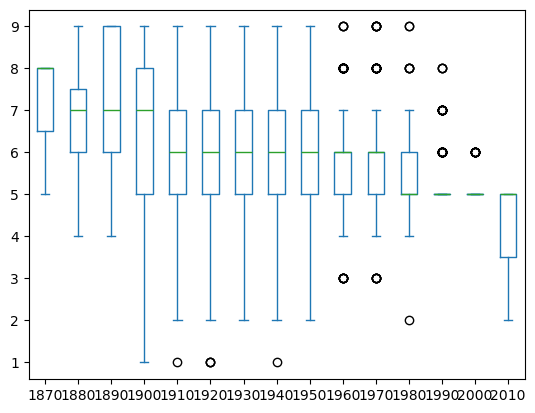

In [59]:
# Group by decade
(housing
 .assign(decade=(housing['Year Built']//10 ) * 10)
 .pivot(columns='decade', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

In [61]:
# or use seaborn
import seaborn as sns
sns.boxplot?


Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

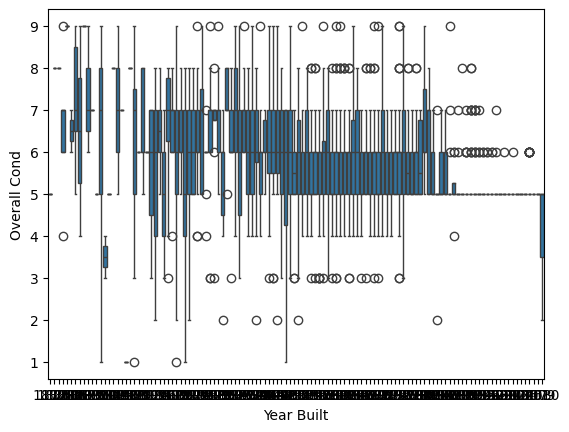

In [62]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond')

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

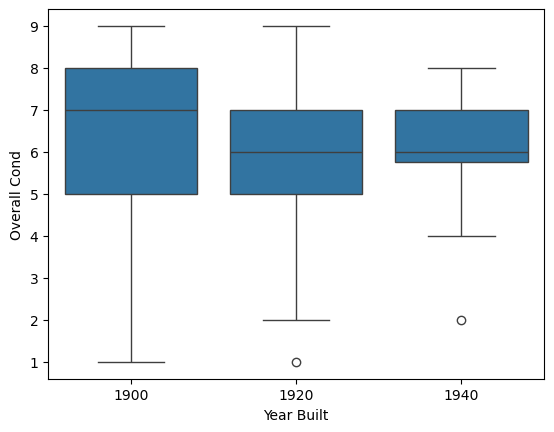

In [63]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

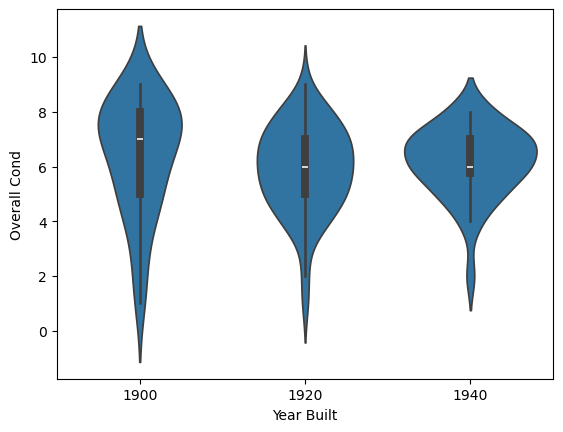

In [64]:
sns.violinplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

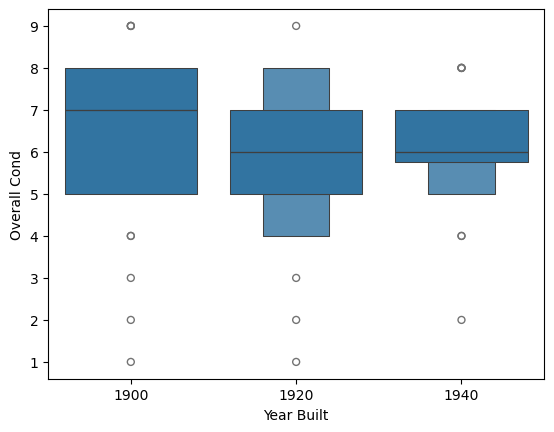

In [65]:
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

## Comparing Two Categoricals

In [66]:
housing.dtypes[:40]

Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
Lot Area          uint32[pyarrow]
Street                   category
Alley                    category
Lot Shape                category
Land Contour             category
Utilities                category
Lot Config               category
Land Slope               category
Neighborhood             category
Condition 1              category
Condition 2              category
Bldg Type                category
House Style              category
Overall Qual       uint8[pyarrow]
Overall Cond       uint8[pyarrow]
Year Built        uint16[pyarrow]
Year Remod/Add    uint16[pyarrow]
Roof Style               category
Roof Matl                category
Exterior 1st             category
Exterior 2nd             category
Mas Vnr Type             category
Mas Vnr Area      uint16[pyarrow]
Exter Qual               category
Exter Cond    

In [67]:
# 2 Categoricals - Cross tabulation
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'])
 .size()
 .unstack()
)

C:\Users\Pavilion HP\AppData\Local\Temp\ipykernel_608\52840291.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Overall Qual', 'Bsmt Cond'])


Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [68]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond']))

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [69]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [71]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

Bsmt Cond,Ex,Gd,TA,Fa,Po
Overall Qual,,,,,
1,0,0,0,0,1
2,0,0,5,4,0
3,0,0,21,9,0
4,0,2,182,16,1
5,1,24,727,39,2
6,1,28,672,28,0
7,0,33,561,5,0
8,1,25,320,3,1
9,0,9,98,0,0


<Axes: xlabel='Overall Qual'>

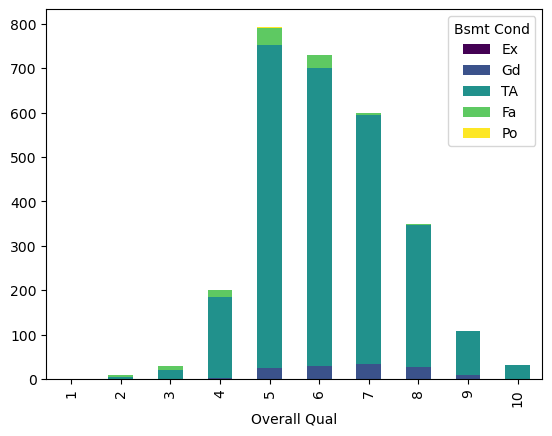

In [72]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
 .plot.bar(stacked=True, 
           cmap='viridis')
)